In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import jacobian as grad, value_and_grad

%matplotlib inline

In [4]:
!pip3 install --user autograd

  Using cached https://files.pythonhosted.org/packages/23/12/b58522dc2cbbd7ab939c7b8e5542c441c9a06a8eccb00b3ecac04a739896/autograd-1.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/45/0b/38b06fd9b92dc2b68d58b75f900e97884c45bedd2ff83203d933cf5851c9/future-0.18.2.tar.gz
    100% |████████████████████████████████| 20.0MB 105kB/s 
  Running setup.py bdist_wheel for autograd ... - done
  Stored in directory: /home/mplazago215.alumnes/.cache/pip/wheels/42/62/66/1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  Running setup.py bdist_wheel for future ... - \ done
  Stored in directory: /home/mplazago215.alumnes/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built autograd future


# Problema 1

Implementeu el mètode iteratiu de Newton 2 - Dimensional.

A l'examen parcial vau implementar el mètode de Newton per funcions d'una variable. 
En aquest cas implementareu la generalització a dues dimensions del màteix mètode.

Per codificar el mètode iteratiu haureu de fer servir la fórmula introduida acontinuació.

Considfereum una funció $f(x)$ 2-dimensional tal que per una parella de valors, $x= (x_1, x_2)$ té com a sortida un únic valor.

Definim el mètode iteriu de Newton com:

$$x^{k+1} = x^{k}-\alpha^{k} (\nabla^2 f(x^{k}))^{-1} \nabla f(x^{k})$$

Recordeu que podeu trobar el gradient ($\nabla f(x^{k})$) amb la funció `grad` d'autograd, que ja està importada. D'igual forma, també en podeu trobar "la segona derivada" ($\nabla^2 f(x^{k})$, hessià).
Observa que:
 * L'expressió $(\nabla^2 f(x^{k}))^{-1}$ indica la **inversa d'una matriu**, que podeu obtenir amb: $\text{np.linalg.inv(}\nabla^2 f(x^{k})\text{)}$
 * La multiplicicació $(\nabla^2 f(x^{k}))^{-1} \cdot \nabla f(x^{k})$ és el **producte matricial** entre $(\nabla^2 f(x^{k}))^{-1}$ i $\nabla f(x^{k})$

A més, $\alpha^k$ és el pas que utilitzarem a cada iteració de forma que:
1. El valor inicial a cada iteració serà `alpha_0`.
2. Calculem $x^{k+1}$ amb la alpha actual
3. Si $f(x^{k+1}) > f(x^{k})$ i $alpha > tol$ dividim l'$\alpha$ entre dos i tornem al pas 2
4. En cas contrari, $x^{k+1}$ és el següent punt del descens i passem a la següent iteració

Per tal d'arribar al mínim de la funció, caldrà iterar fins a arribar a un màxim d'iteracions o fins que $|f(x^{k+1}) - f(x^{k})|< tol$.

In [112]:
def newton(x, f, alpha_0, max_iter=1000, tol=1e-3):
    """
    Funció que implementa el mètode iteratiu de Newton.
    Retorna un numpy array amb els els punts (2-dimensionals) que segueix el mètode
    fins arribar al mínim.
    
    :param x: Punt inicial del mètode iteratiu.
    :param f: Funció de la qual volem trobar el mínim.
    :param max_iter: Nombre màxim d'iteracions
    :param tol: Tolerància màxima per $alpha$ i criteri d'aturada
    :return: np.array amb el conjunt de punts per on passa el mètode. shape: (n + 1, 2), 
        on n són les iteracions fetes (+ 1 pel punt inicial)
    """
    # Inclou el punt inicial
    path = [x]
    
    #obtenim primera i segona derivada
    p = grad(f)
    s = grad(p)
    
    #primer punt i alpha inicial
    x0 = x
    alpha = alpha_0
    
    for i in range(max_iter):
        
        #calcul del seguent punt
        next_x = x0 - alpha * np.dot(np.linalg.inv(s(x0)),p(x0))
        
        #si compleix la condicio esmentada a l'enunciat dividim alpha per dos i tornem al punt 2
        if f(next_x) > f(x0) and alpha > tol:
            alpha = alpha / 2
            continue
            
        #d'altra banda proseguim el calcul 
        else:
            #condicio d'aturada
            if np.abs(f(next_x)-f(x0)) < tol:
                break
                
            #afegim el punt al cami
            path.append(next_x)
            x0 = next_x
            alpha = alpha_0
        
    return np.array(path)

In [53]:
def generate_grid(function, axisX = [-2, 2, 0.05], axisY = [-2, 2, 0.05], contour = 50):
    """
    Funció Auxiliar que visualitza el grid
    """
    # Function to analyze
    X = np.arange(axisX[0], axisX[1], axisX[2])
    Y = np.arange(axisY[0], axisY[1], axisY[2])
    X, Y = np.meshgrid(X, Y)
    Z = function(np.array((X, Y)))

    # Contour plot en 2D
    plt.figure()
    plt.contour(X, Y, Z, contour)
    
    return X, Y, Z

# Funcions per visualitzar el resultat
def f(x):
    return 100*x[0]**2 + x[1]**2

def g(x):
    return x[0]**2 * (4. - 2.1 * x[0]**2 + 1/3 * x[0]**4) + x[0]*x[1] + x[1]**2 *(-4. + 4. * x[1]**2)

[[1. 1.]
 [0. 0.]]
Backtraking Gradient Descent Algorithm with  1  iterations.


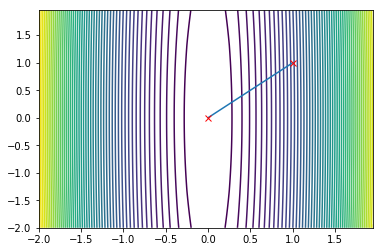

In [54]:
x_0 = np.ones(2)
p = newton(x_0, f, 1)
print(p)
print ("Backtraking Gradient Descent Algorithm with ",len(p)-1, " iterations.")
generate_grid(f)
# draw the path the gradient decent follows for each of the starting points
plt.plot (p[:, 0], p[:,1])
plt.plot (p[:, 0], p[:,1], 'rx')
plt.show()

[[ 0.5         0.5       ]
 [-0.43674699  0.92168675]
 [ 0.14405904  0.7600387 ]
 [-0.10253459  0.7173653 ]]
Backtraking Gradient Descent Algorithm with  3  iterations.


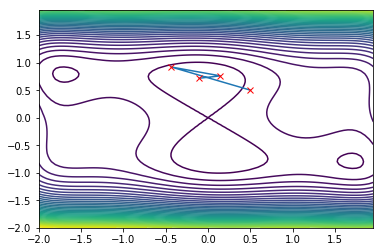

In [55]:
x_0 = 0.5 * np.ones(2)
p = newton(x_0, g, 1.0)
print(p)
print ("Backtraking Gradient Descent Algorithm with ",len(p)-1, " iterations.")
generate_grid(g)
# draw the path the gradient decent follows for each of the starting points
plt.plot (p[:, 0], p[:,1])
plt.plot (p[:, 0], p[:,1], 'rx')
plt.show()

# Problema 2

Tenim unes dades que segueixen una distribució exponencial, $f(x) = y = 1.05^x$, però aquestes contenen soroll que les allunya lleugerament del seu valor esperat.

En la següent gràfica podeu veure en negre la distribució que segueixen, i en blau els punts obtinguts en la mesura (amb soroll)

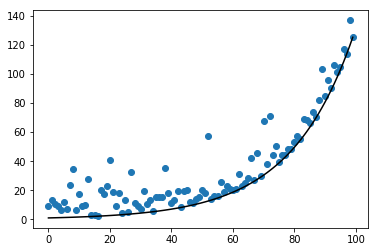

In [56]:
np.random.seed(0)

X_p2 = np.arange(100)
Y_p2 = 1.05**X_p2 + np.random.exponential(scale=10, size=100)

plt.scatter(X_p2, Y_p2)
plt.plot(X_p2, 1.05**X_p2, c='black')

Volem crear un model per aquestes dades. Per fer-ho implementa gradient descent. Recorda, cada iteració $k$ calcula

$$x^{k+1} = x^{k} - \alpha^{k} \dfrac{\nabla f(x^{k})}{||\nabla f(x^{k})||}$$

Fixa't que a cada pas normalitzem el gradient per la seva norma. Iterem fins que $||\alpha^{k} \nabla f(x^{k})|| < eps$ (i de nou, fixa't que aquí **no** està normalitzat) o bé s'arriba a un màxim d'iteracions

In [109]:
def gradient_descend(f, x0, alpha, eps=1e-6, max_iter=1000, print_iters=100):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, la funció de la que calculem el gradient i el pas, 
    intenta trobar el mínim de la funció seguint el gradient en direcció oposada.
    
    Cada print_iters cal mostrar el resultat actual en la següent forma:
        print('{}: {:.6f}'.format(itr_k, float(valor_de_f_en_x)))
        
    
    :param f: Funció a minimitzar
    :param x0: Punt inicial
    :param alpha: Pas a cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param print_iters: Numero d'iteracions cada quan printar resultats
    :return: El punt mínim
    """
    #obtenim la primera derivada de la funcio
    p = grad(f)
    
    #el punt inicial
    x = x0
    
    for i in range(max_iter):
        #normalitzem el gradient per la seva norma
        norm = p(x)/np.linalg.norm(p(x))
        
        #imprimim els resultats
        if i%print_iters == 0: print('iteració número {} : valor de f(x) {:.6f}'.format(i, float(f(x))))
            
        #calculem la nova x 
        next_x = x - alpha * norm
        
        #condició de parada
        if np.linalg.norm(alpha*p(x)) < eps:
            break
            
        x = next_x
    
    return x

Estimarem un model a partir de la funció anterior i les funcions per fer regressions lineals que vam implementar en la pràctica 2b.

In [110]:
def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def linear_regression(x, w):
    return np.sum(x * w, axis=1)

def loss(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred)

def model(w, x, y, loss=loss):
    return loss(y, linear_regression(x, w))

Podem crear un model de regressió lineal que s'adapti a les dades

In [111]:
X_p2_model = X_p2[..., np.newaxis]
X_p2_model = add_bias(X_p2_model)
w_p2_model = np.random.random(size=[1, X_p2_model.shape[1]])
w_p2_final = gradient_descend(lambda w: model(w, X_p2_model, Y_p2), w_p2_model, 0.0001, max_iter=100000, print_iters=10000)

iteració número 0 : valor de f(x) 212.886539
iteració número 10000 : valor de f(x) 191.714170
iteració número 20000 : valor de f(x) 190.664395
iteració número 30000 : valor de f(x) 189.742568
iteració número 40000 : valor de f(x) 188.950562
iteració número 50000 : valor de f(x) 188.290015
iteració número 60000 : valor de f(x) 187.762315
iteració número 70000 : valor de f(x) 187.368585
iteració número 80000 : valor de f(x) 187.109669
iteració número 90000 : valor de f(x) 186.988315


Però, com es pot observar, el model (línia recta vermella) és incapaç d'aproximar la distribució exponencial real (línia negra) de les nostres dades.

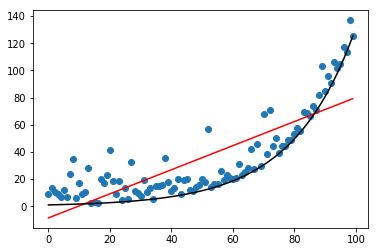

In [113]:
plt.scatter(X_p2, Y_p2)
plt.plot(X_p2, linear_regression(X_p2_model, w_p2_final), c='r')
plt.plot(X_p2, 1.05**X_p2, c='black')

Modifica en la següent cel·la les dades `x_p2_improved` de forma que incloguin una nova característica que permetin modelar millor la distribució.

Ara mateix les nostres dades tenen una única característica (sense comptar el *bias* que afegim després). Sigui aquesta característica $x$ (de fet, la coordenada $x$), afageix una nova característica $x^2$. Únicament pots modificar les dades en el lloc indicat, sense bucles i sense modifiquis cap altra funció ni cel·la.

In [167]:
X_p2_improved = X_p2[..., np.newaxis]

###############################################
# AFAGEIX LA CARACTERÍSTICA AQUÍ (sense bucles)
###############################################

#afegim la caracteristica obtenint una millor aproximacio amb els quadrats del vector
arr = X_p2_improved**2
X_p2_improved = np.hstack((X_p2_improved,arr))

X_p2_improved = add_bias(X_p2_improved)
w_p2_improved_model = np.random.random(size=[1, X_p2_improved.shape[1]])
w_p2_improved_final = gradient_descend(lambda w: model(w, X_p2_improved, Y_p2), w_p2_improved_model, 0.0001, max_iter=100000, print_iters=10000)

iteració número 0 : valor de f(x) 5668.962844
iteració número 10000 : valor de f(x) 158.443173
iteració número 20000 : valor de f(x) 151.285629
iteració número 30000 : valor de f(x) 146.397430
iteració número 40000 : valor de f(x) 143.097497
iteració número 50000 : valor de f(x) 140.888357
iteració número 60000 : valor de f(x) 139.417875
iteració número 70000 : valor de f(x) 138.442572
iteració número 80000 : valor de f(x) 137.796899
iteració número 90000 : valor de f(x) 137.369604


Si està ben implementat, hauries de veure que el nou model (en verd) s'adapta millor a les dades. No és necessari que s'adapti perfectament a les dades, en concret el que hauries de veure és que el model en verd no crea una línia recta, a diferència del vermell.

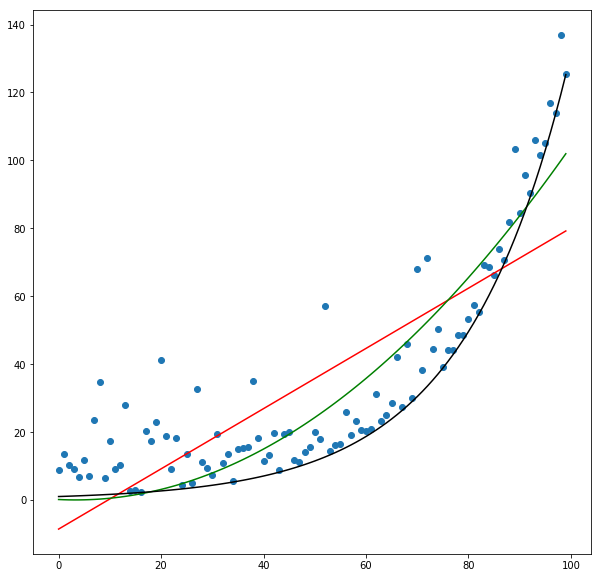

In [168]:
plt.figure(figsize=(10, 10))
plt.scatter(X_p2, Y_p2)
plt.plot(X_p2, linear_regression(X_p2_model, w_p2_final), c='r')
plt.plot(X_p2, linear_regression(X_p2_improved, w_p2_improved_final), c='g')
plt.plot(X_p2, 1.05**X_p2, c='black')